# CZ1104 Linear Algebra for Computing - Lab 2

## Name: Dion Toh Siyong
## Matriculation Number: U2021674D

## Exercise 1: Computer Graphics – Linear Transformations

### Question 1:

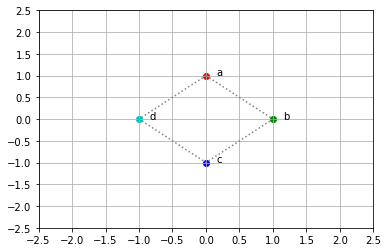

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string
import pandas as pd

# points a, b and, c
a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)

# matrix with row vectors of points
A = np.array([a, b, c, d])

# 3x3 Identity transformation matrix
I = np.eye(3) #float

 #4 colors to represent 4 points

def plot_array(matrix_1, basis_vectors):
    color_lut = 'rgbc'
    fig = plt.figure()
    ax = plt.gca()
    xs = []
    ys = []
    for row in matrix_1:
        output_row = basis_vectors @ row
        x, y, i = output_row
        xs.append(x)
        ys.append(y)
        i = int(i) # convert float to int for indexing
        c = color_lut[i]
        plt.scatter(x, y, color=c)
        plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
    xs.append(xs[0])
    ys.append(ys[0])
    plt.plot(xs, ys, color="gray", linestyle='dotted')
    ax.set_xticks(np.arange(-2.5, 3, 0.5))
    ax.set_yticks(np.arange(-2.5, 3, 0.5))
    plt.grid()
    plt.show()
    
plot_array(A,I)

### Question 2:

Scale:


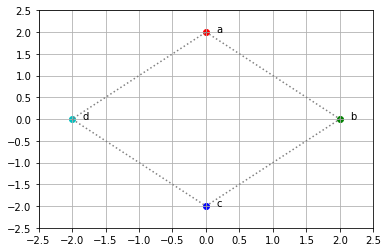

In [2]:
#(i)
#Scale x and y axis by 2
T1 = np.array([(2,0,0), (0,2,0), (0,0,1)])
print("Scale:")
plot_array(A,T1)

Rotation:


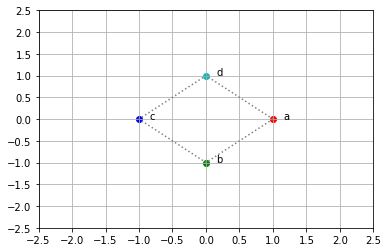

In [3]:
#(ii)
import math
sin = math.sin
cos = math.cos
pi = math.pi

# Transformation matrix, 90 degrees clockwise
R = np.array([(cos(pi/2), sin(pi/2), 0),
                          (-sin(pi/2), cos(pi/2), 0),
                          (0, 0, 1)])
print("Rotation:")
plot_array(A,R)

Original:


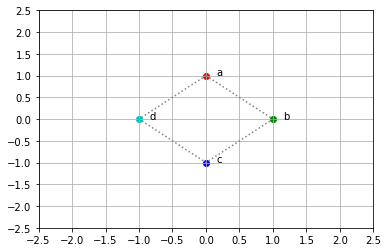

Translation:


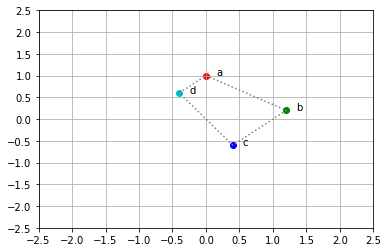

Horizontal Shear:


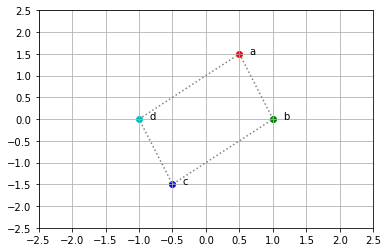

Vertical Shear:


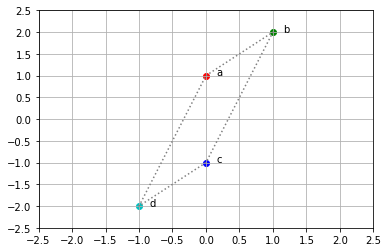

In [4]:
#(iii)

#Translate matrix by 0.2 unit
T2 = np.array([(1,0,0.2), (0,1,0.2), (0,0,1)])

#Horizontal Shear
T3 = np.array([(1,0.5,0), (0,1.5,0), (0,0,1)])

#Vertical Shear
T4 = np.array([(1,0,0), (2,1,0), (0,0,1)])

print("Original:")
plot_array(A,I)
print("Translation:")
plot_array(A,T2)
print("Horizontal Shear:")
plot_array(A,T3)
print("Vertical Shear:")
plot_array(A,T4)

### Question 3:

Rotation & Scale:


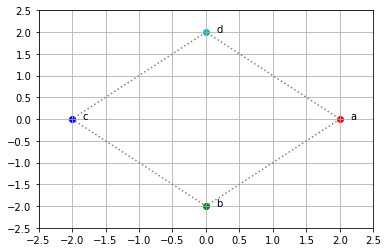

In [5]:
#Rotate then scale
T5 = np.matmul(T1, R)
print("Rotation & Scale:")
plot_array(A,T5)

## Exercise 2: Web Search – PageRank (not quite, but almost)

In [6]:
import numpy as np

'''Function to transform a matrix to reduced row echelon form'''
def rref(A):
    tol = 1e-16
    #A = B.copy()
    rows, cols = A.shape
    r = 0
    pivots_pos = []
    row_exchanges = np.arange(rows)
    for c in range(cols):
        ## Find the pivot row:
        pivot = np.argmax (np.abs (A[r:rows,c])) + r
        m = np.abs(A[pivot, c])
        if m <= tol:
        ## Skip column c, making sure the approximately zero terms are
        ## actually zero.
            A[r:rows, c] = np.zeros(rows-r)
        else:
            ## keep track of bound variables
            pivots_pos.append((r,c))

            if pivot != r:
                ## Swap current row and pivot row
                A[[pivot, r], c:cols] = A[[r, pivot], c:cols]
                row_exchanges[[pivot,r]] = row_exchanges[[r,pivot]]

            ## Normalize pivot row
            A[r, c:cols] = A[r, c:cols] / A[r, c];

            ## Eliminate the current column
            v = A[r, c:cols]
            ## Above (before row r):
            if r > 0:
                ridx_above = np.arange(r)
                A[ridx_above, c:cols] = A[ridx_above, c:cols] - np.outer(v, A[ridx_above, c]).T
                ## Below (after row r):
            if r < rows-1:
                ridx_below = np.arange(r+1,rows)
                A[ridx_below, c:cols] = A[ridx_below, c:cols] - np.outer(v, A[ridx_below, c]).T
                r += 1
        ## Check if done
        if r == rows:
            break;
    return A

### Question 4:

In [7]:
#Matricx L
L = np.array([(0, 1/3, 1/3, 1/2),
             (1/2, 0, 1/3, 0),
             (1/2, 1/3, 0, 1/2),
             (0, 1/3, 1/3, 0)])

I = np.eye(4)

#Matrix (L-I)
L_I = 3*(L-I)

#Augmented Matrix
z = np.zeros((4,1))
aug = np.append(L_I, z, axis = 1)

rref(aug)

rA = aug[0][3] * -1
rB = aug[1][3] * -1
rC = aug[2][3] * -1

print(aug)
print("Value of rA:", rA, "rD.")
print("Value of rB:", rB, "rD.")
print("Value of rC:", rC, "rD.")
print("rD is a free variable.")
print("\n4a) Yes \n4b) Yes \n4c) No, rD is a free variable, and can take on any value.")

[[ 1.      0.      0.     -1.5    -0.    ]
 [ 0.      1.      0.     -1.3125 -0.    ]
 [ 0.      0.      1.     -1.6875 -0.    ]
 [ 0.      0.      0.      0.      0.    ]]
Value of rA: 1.5 rD.
Value of rB: 1.3125 rD.
Value of rC: 1.6875 rD.
rD is a free variable.

4a) Yes 
4b) Yes 
4c) No, rD is a free variable, and can take on any value.


### Question 5:

In [8]:
W = np.array([(0, 1/2, 1/4, 1, 1/3),
             (1/3, 0, 1/4, 0, 0),
             (1/3, 1/2, 0, 0, 1/3),
             (1/3, 0, 1/4, 0, 1/3),
             (0, 0, 1/4, 0, 0)])
I = np.eye(5)
z = np.zeros((5,1))
W_I = 12 * (W-I)
aug = np.append(W_I, z, axis = 1)

rref(aug)

x1 = aug[0][4] * -1
x2 = aug[1][4] * -1
x3 = aug[2][4] * -1
x4 = aug[3][4] * -1
print(aug)
print("Value of x1:", x1, "x5.")
print("Value of x2:", x2, "x5.")
print("Value of x3:", x3, "x5.")
print("Value of x4:", x4, "x5.")
print("x5 is a free variable, and can take on any value.")

[[ 1.          0.          0.          0.         -6.33333333 -0.        ]
 [ 0.          1.          0.          0.         -3.11111111 -0.        ]
 [ 0.          0.          1.          0.         -4.         -0.        ]
 [ 0.          0.          0.          1.         -3.44444444 -0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]
Value of x1: 6.333333333333334 x5.
Value of x2: 3.1111111111111116 x5.
Value of x3: 4.0 x5.
Value of x4: 3.4444444444444446 x5.
x5 is a free variable, and can take on any value.


## Exercise 3: Epidemic Dynamics – SIR model

### Question 6:

In [11]:
xt_0 = np.array([0.75, 0.1, 0.1, 0.05])

P = np.array([(0.95, 0.04, 0, 0),
             (0.05, 0.85, 0, 0),
             (0, 0.1, 1, 0),
             (0, 0.01, 0, 1)])

xt_1 = np.matmul(xt_0, P)

print("P:\n", P)
print("State of disease the next day:", xt_1)

P:
 [[0.95 0.04 0.   0.  ]
 [0.05 0.85 0.   0.  ]
 [0.   0.1  1.   0.  ]
 [0.   0.01 0.   1.  ]]
State of disease the next day: [0.7175 0.1255 0.1    0.05  ]


### Question 7:

          S         I         R         D  t
0  1.000000  0.000000  0.000000  0.000000  1
1  0.950000  0.050000  0.000000  0.000000  2
2  0.904500  0.090000  0.005000  0.000500  3
3  0.862875  0.121725  0.014000  0.001400  4
4  0.824600  0.146610  0.026173  0.002617  5


<AxesSubplot:xlabel='t'>

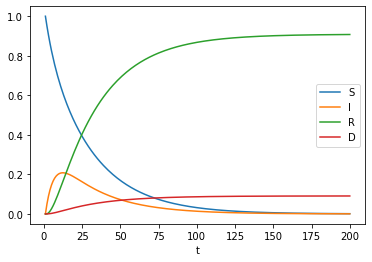

In [12]:
x_1 = np.array([1, 0, 0, 0])

x_progression = [x_1.flatten()]
x_recent = x_1
for t in range(2,201):
    x_t = np.matmul(P, x_recent)
    x_progression.append(x_t.flatten())
    x_recent = x_t

df = pd.DataFrame(x_progression, columns=['S', 'I', 'R', 'D'])
df['t'] = [t for t in range(1,201)]
print(df.head())
df.plot(x='t', y=['S','I','R','D'])